<a href="https://colab.research.google.com/github/dayyaanjattiem/Data-Analysis-Course/blob/main/Stock_Screener_Iteration_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import timedelta

In [7]:
# Function to calculate RSI (Relative Strength Index)
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi.iloc[-1] if not rsi.isna().all() else np.nan


🔍 Processing stock: MTN.JO
Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.4433 - mae: 0.4840 - val_loss: 0.0177 - val_mae: 0.1011
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0521 - mae: 0.1736 - val_loss: 0.0169 - val_mae: 0.0983
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mae: 0.1456 - val_loss: 0.0144 - val_mae: 0.0926
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0381 - mae: 0.1400 - val_loss: 0.0142 - val_mae: 0.0933
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0355 - mae: 0.1408 - val_loss: 0.0144 - val_mae: 0.0991
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0369 - mae: 0.1344 - val_loss: 0.0183 - val_mae: 0.1042
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - mae: 0.1515 - val_loss: 0.0133 - val_mae: 0.0929
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0322 - mae: 0.1312 - val_loss: 0.0129 - val_mae: 0.0938
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8m

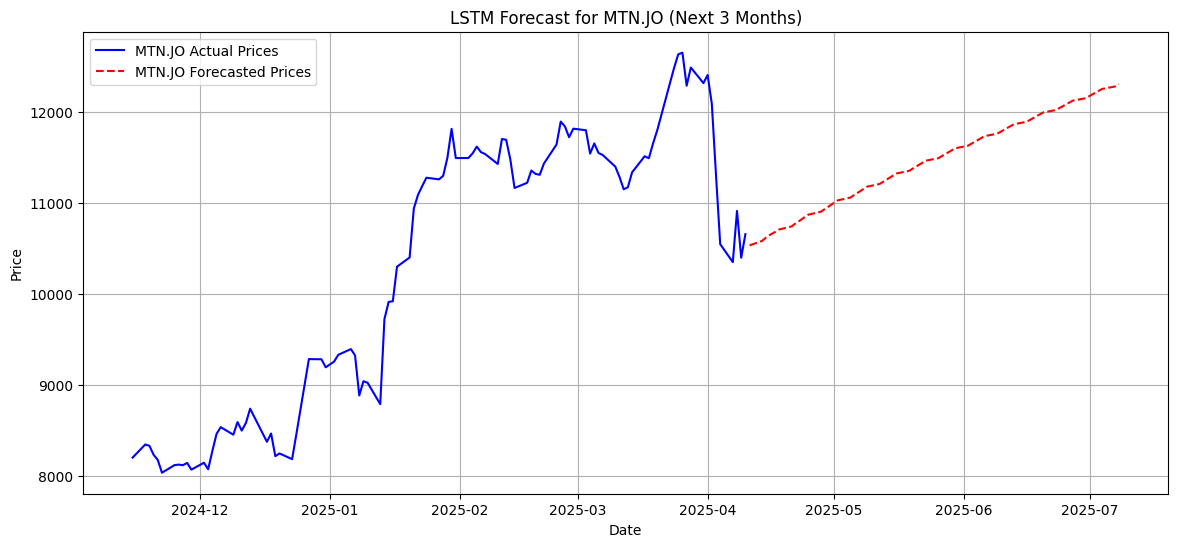

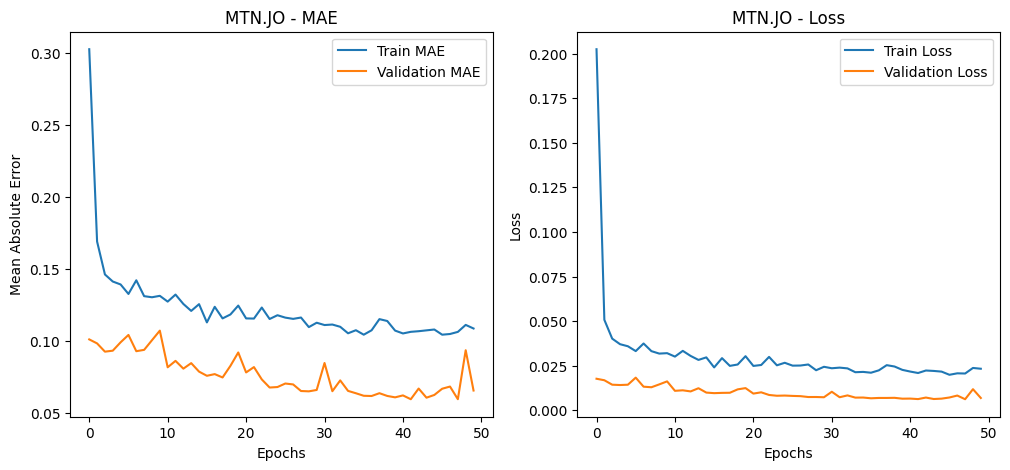


🔍 Processing stock: ANG.JO
Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2901 - mae: 0.4052 - val_loss: 0.0637 - val_mae: 0.1965
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0601 - mae: 0.1888 - val_loss: 0.0523 - val_mae: 0.1789
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0461 - mae: 0.1645 - val_loss: 0.0491 - val_mae: 0.1722
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0488 - mae: 0.1724 - val_loss: 0.0395 - val_mae: 0.1614
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0530 - mae: 0.1758 - val_loss: 0.0338 - val_mae: 0.1450
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0376 - mae: 0.1506 - val_loss: 0.0327 - val_mae: 0.1429
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0365 - mae: 0.1447 - val_loss: 0.0306 - val_mae: 0.1382
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0396 - mae: 0.1474 - val_loss: 0.0328 - val_mae: 0.1420
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8m

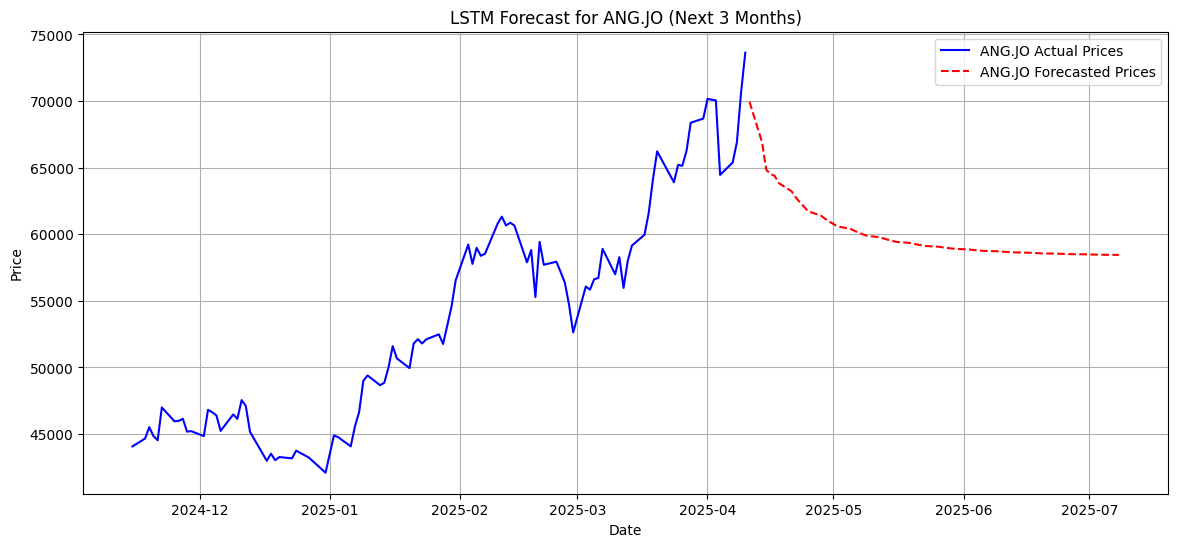

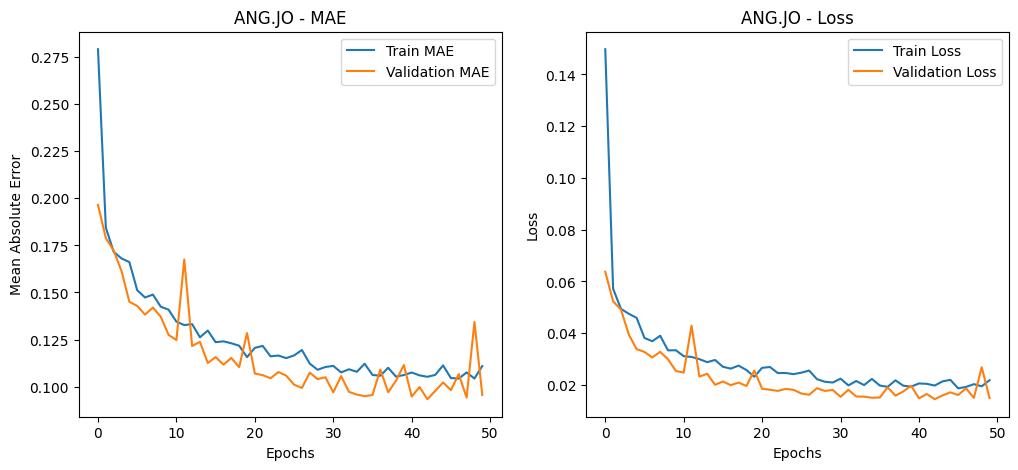


🔍 Processing stock: TFG.JO
Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4676 - mae: 0.5028 - val_loss: 0.1428 - val_mae: 0.2776
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0544 - mae: 0.1827 - val_loss: 0.0753 - val_mae: 0.2030
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0562 - mae: 0.1813 - val_loss: 0.0800 - val_mae: 0.2102
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0517 - mae: 0.1714 - val_loss: 0.0541 - val_mae: 0.1727
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0412 - mae: 0.1541 - val_loss: 0.0408 - val_mae: 0.1449
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0481 - mae: 0.1653 - val_loss: 0.0467 - val_mae: 0.1595
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - mae: 0.1557 - val_loss: 0.0390 - val_mae: 0.1385
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 - mae: 0.1528 - val_loss: 0.0310 - val_mae: 0.1258
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8m

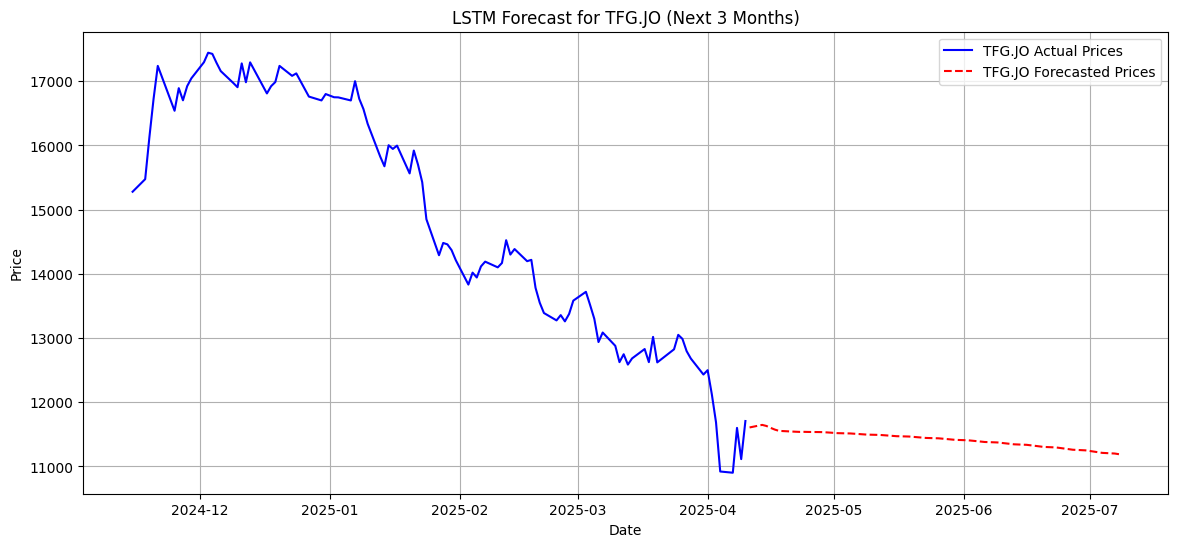

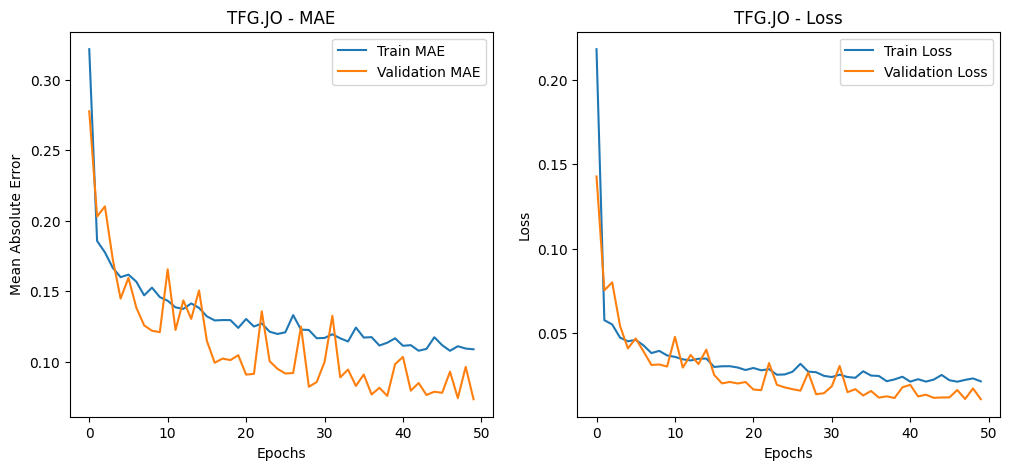

In [11]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

# Parameters
tickers = ["MTN.JO", "ANG.JO", "TFG.JO"]
window_size = 10  # Number of timesteps (days) in each input sequence
forecast_days = 63  # ~3 months of trading days

for ticker in tickers:
    print(f"\n🔍 Processing stock: {ticker}")

    stock = yf.Ticker(ticker)
    hist = stock.history(period="5y")

    if hist.empty:
        print(f"⚠️ Warning: No data for {ticker}")
        continue

    closing_prices = hist['Close'].values.reshape(-1, 1)

    scaler = StandardScaler()
    scaled_prices = scaler.fit_transform(closing_prices)

    # Create sequences
    X_all, y_all = [], []
    for i in range(window_size, len(scaled_prices) - forecast_days):
        X_all.append(scaled_prices[i - window_size:i])
        y_all.append(scaled_prices[i])

    X = np.array(X_all)  # Shape: (samples, timesteps, 1)
    y = np.array(y_all)

    # Train-test split
    split_ratio = 0.8
    split_index = int(len(X) * split_ratio)
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]

    # Build LSTM model
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

    loss, mae = model.evaluate(X_test, y_test)
    print(f"✅ Test MAE for {ticker}: {mae:.4f}")

    # Forecast next 63 days
    last_sequence = scaled_prices[-window_size:]
    forecast_scaled = []

    for _ in range(forecast_days):
        input_seq = last_sequence.reshape(1, window_size, 1)
        pred_scaled = model.predict(input_seq, verbose=0)[0][0]
        forecast_scaled.append(pred_scaled)

        last_sequence = np.append(last_sequence[1:], [[pred_scaled]], axis=0)

    forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1)).flatten()

    # Generate forecast dates (only weekdays)
    last_date = hist.index[-1]
    forecast_dates = []
    i = 1
    while len(forecast_dates) < forecast_days:
        next_date = last_date + timedelta(days=i)
        if next_date.weekday() < 5:
            forecast_dates.append(next_date)
        i += 1

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(hist.index[-100:], closing_prices[-100:], label=f"{ticker} Actual Prices", color='blue')
    plt.plot(forecast_dates, forecast, label=f"{ticker} Forecasted Prices", color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'LSTM Forecast for {ticker} (Next 3 Months)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Save model
    model.save(f"{ticker}_lstm_forecast_model.h5")

    # Plot MAE and Loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.title(f"{ticker} - MAE")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"{ticker} - Loss")
    plt.legend()

    plt.show()
